In [1]:
import numpy as np 
import pandas as pd 
from scipy import linalg
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

np.random.seed(100)  

## 1. Loading the Data


In [2]:
#Data composited every 2 metres
import pandas as pd

two_composite = pd.read_csv("Data/two_composite.csv", low_memory=False)

In [3]:
two_composite.sort_index(axis=1)

,Ag_ppm,Al_pct,Alt1_Code,Alt1_Int,Alt1_Style,Alt2_Code,Alt2_Int,Alt2_Style,Ars_ppm,Au_ppb,...,Vein2_Style,W_ppm,Weathering,X,Y,Y_ppm,Z,Zn_ppm,Zr_ppm,samp_id
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3498947.63,7511204.97,NaN,236.38,NaN,NaN,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3498948.84,7511204.92,NaN,234.79,NaN,NaN,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3498950.05,7511204.87,NaN,233.20,NaN,NaN,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3498951.26,7511204.82,NaN,231.61,NaN,NaN,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3498952.47,7511204.77,NaN,230.01,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97858,0.51,1.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,3498735.00,7510855.00,2.24,116.50,5.13,NaN,0
97859,0.25,1.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,3498735.00,7510855.00,1.48,114.50,7.87,NaN,0
97860,0.38,1.46,NaN,NaN,NaN,NaN,NaN,NaN,1.39,0.0,...,NaN,NaN,NaN,3498735.00,7510855.00,2.56,112.50,8.55,NaN,0
97861,0.16,1.20,NaN,NaN,NaN,NaN,NaN,NaN,5.31,0.9,...,NaN,NaN,NaN,3498735.00,7510855.00,1.41,110.50,7.94,NaN,0


# 2. Clustering

In [4]:
two_composite_filtered = pd.read_csv("Data/two_composite.csv", low_memory=False)

In [5]:
data = two_composite_filtered.iloc[:, 4:7]
data = np.array(data)

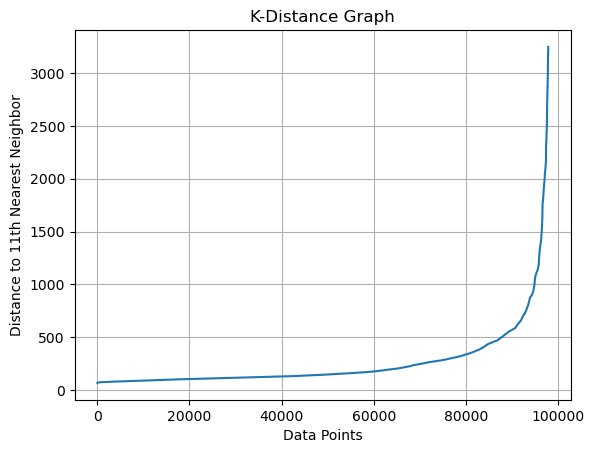

In [6]:
nn = NearestNeighbors(n_neighbors=1000)  # Adjust k as needed
nn.fit(data)
distances, _ = nn.kneighbors(data)

# Sort the distances
sorted_distances = np.sort(distances[:, -1])

plt.plot(range(len(data)), sorted_distances)
plt.xlabel("Data Points")
plt.ylabel("Distance to 11th Nearest Neighbor")
plt.title("K-Distance Graph")
plt.grid()
plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

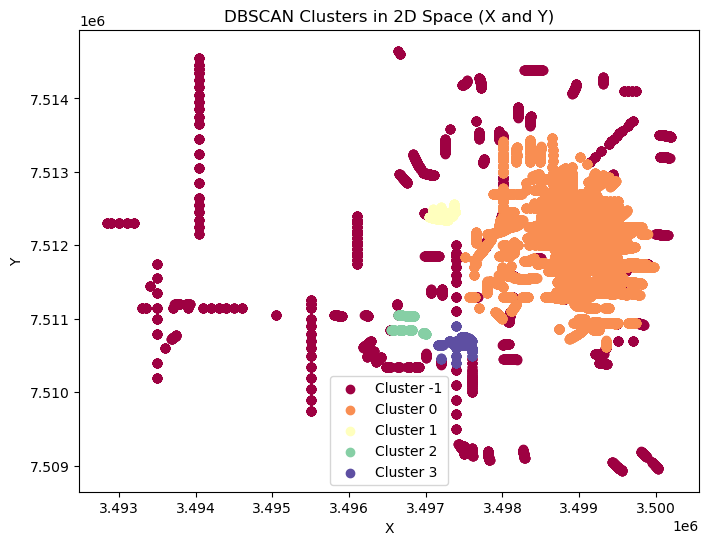

In [7]:

epsilon = 250 
dbscan = DBSCAN(eps=epsilon, min_samples=500)  
clusters = dbscan.fit_predict(data)

plt.figure(figsize=(8, 6))

# Get unique cluster labels
unique_labels = np.unique(clusters)

# Define colors for each cluster
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# Plot each point with a unique color based on its cluster label
for label, color in zip(unique_labels, colors):
    cluster_points = data[clusters == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=color, label=f'Cluster {label}')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('DBSCAN Clusters in 2D Space (X and Y)')

plt.legend()
plt.show()


In [8]:
epsilon = 250 
dbscan = DBSCAN(eps=epsilon, min_samples=800)  # Adjust min_samples as needed
clusters = dbscan.fit_predict(data)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


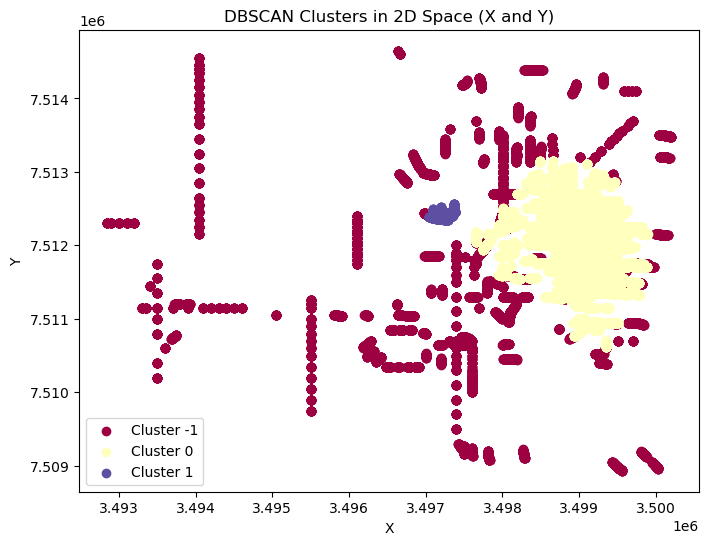

In [9]:
plt.figure(figsize=(8, 6))

# Get unique cluster labels
unique_labels = np.unique(clusters)

# Define colors for each cluster
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# Plot each point with a unique color based on its cluster label
for label, color in zip(unique_labels, colors):
    cluster_points = data[clusters == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=color, label=f'Cluster {label}')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('DBSCAN Clusters in 2D Space (X and Y)')

plt.legend()
plt.show()


In [10]:
cluster_label_to_select = 0  # The cluster label I want to select
# Filter the DataFrame to select only the data points in cluster 0
cluster_0_data = two_composite_filtered[clusters == cluster_label_to_select]

# 'cluster_0_data' now contains only the data points in cluster 0
filename = "Data\cluster_0_data.csv"
cluster_0_data.to_csv(filename, index=False)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


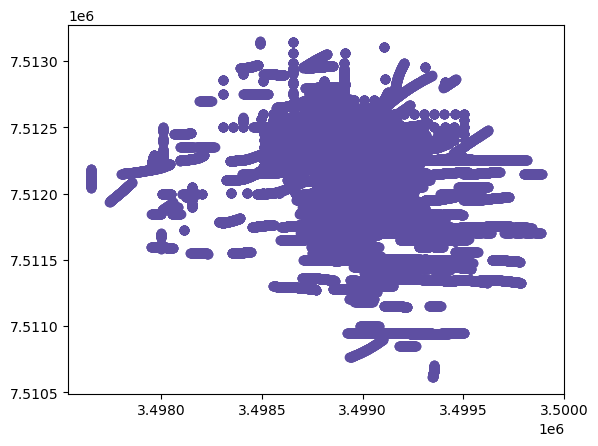

In [11]:
cluster_points = data[clusters == 0]
plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=color, label=f'Cluster {label}')